In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df = data.copy()
df.rename(inplace= True,
          columns={"race/ethnicity":"race_ethnicity",
                   "parental level of education":"education_level",
                   "test preparation course":"prep_course",
                   "math score":"math_score",
                   "reading score":"reading_score",
                   "writing score":"writing_score"})

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   race_ethnicity   1000 non-null   object
 2   education_level  1000 non-null   object
 3   lunch            1000 non-null   object
 4   prep_course      1000 non-null   object
 5   math_score       1000 non-null   int64 
 6   reading_score    1000 non-null   int64 
 7   writing_score    1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [ ]:
df.head()

,gender,race_ethnicity,education_level,lunch,prep_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
df.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
def Grade(AverageScore):
    if (AverageScore >= 80):return '1'
    if (AverageScore >= 70):return '2'
    if (AverageScore >= 60):return '3'
    if (AverageScore >= 50):return '4'
    else: return '5'
    
df["grade"] = df.apply(lambda x : Grade(x["average_score"]), axis=1)

In [ ]:
df.head()

,gender,race_ethnicity,education_level,lunch,prep_course,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,5
4,male,group C,some college,standard,none,76,78,75,76.333333,2


In [ ]:
df.shape

(1000, 10)

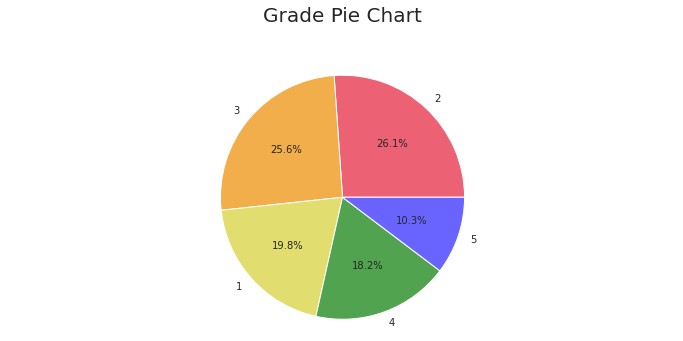

In [ ]:
plt.figure(figsize=(12, 5))
labels=df['grade'].value_counts().index
plt.pie(df['grade'].value_counts().values,labels=labels,autopct='%1.1f%%',
        colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"])
plt.title('Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

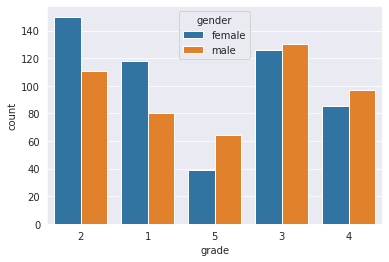

In [ ]:
import seaborn as sns
ax = sns.countplot(x="grade", hue="gender",data=df)

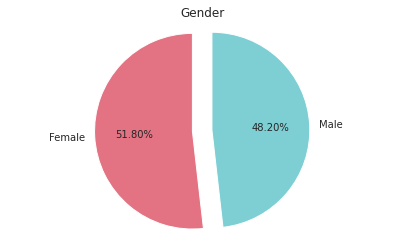

In [ ]:
#ax = sns.countplot(x="gender",data=df)
plt.figure(figsize=(7, 4))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['#E37383','#7ecfd4'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

In [ ]:
# No big difference between femals and males numbers

In [ ]:
# No big difference between femals and males Avrege Score
# Gender does not affect much 

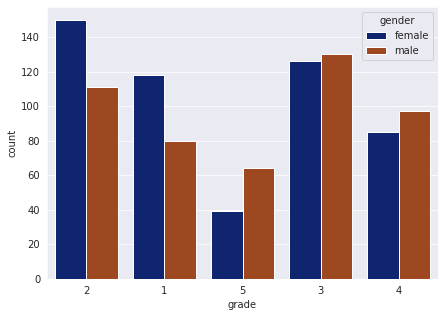

In [ ]:
plt.subplots(figsize=(7,5))
sns.countplot(x = df['grade'], data = df, hue = df['gender'], palette = 'dark')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

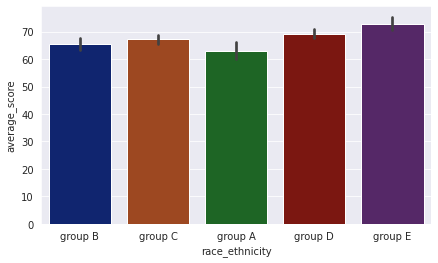

In [ ]:
plt.figure(figsize=(7, 4))

sns.barplot(x='race_ethnicity',y='average_score',data=df, palette = 'dark')

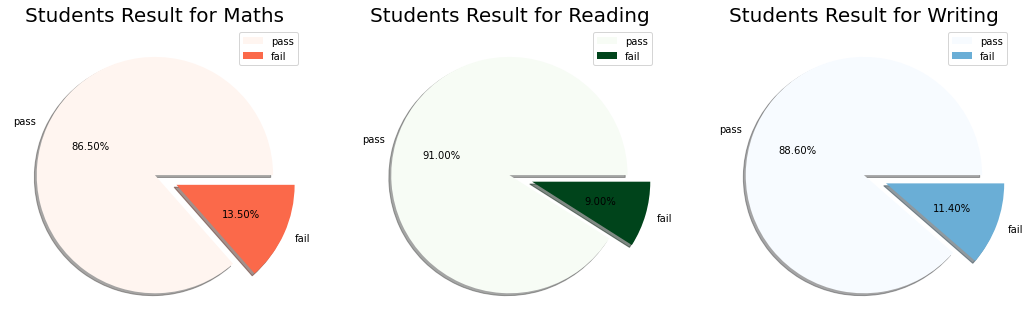

In [ ]:
passmarks = 50
plt.rcParams['figure.figsize'] = (18, 12)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

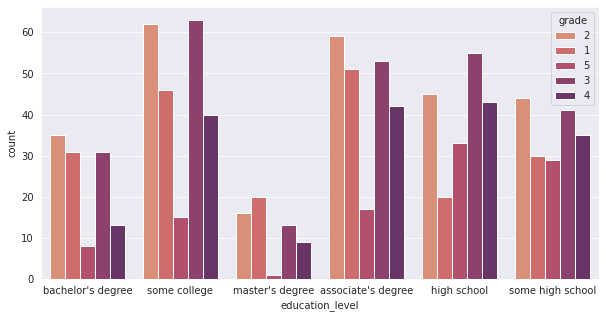

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(x = df['education_level'], data =df, hue = df['grade'], palette = 'flare')
plt.show()

In [ ]:
i = 0
for x in df.gender:
  if x == 'female':
     df.gender[i] = 0
  else:
    df.gender[i] = 1
  i+=1   

i=0
for x in df.race_ethnicity:
  if x == 'group A':
     df.race_ethnicity[i] = 1
  elif x == 'group B':
    df.race_ethnicity[i] = 2
  elif x == 'group C':
    df.race_ethnicity[i] = 3
  elif x == 'group D':
    df.race_ethnicity[i] = 4
  elif x == 'group E':
    df.race_ethnicity[i] = 5
  i+=1   


i=0
for x in df.education_level:
  if x == 'bachelor\'s degree':
     df.education_level[i] = 1
  elif x == 'some college':
    df.education_level[i] = 2
  elif x == 'master\'s degree':
    df.education_level[i] = 3
  elif x == 'associate\'s degree':
    df.education_level[i] = 4
  elif x == 'high school':
    df.education_level[i] = 5
  elif x == 'some high school':
    df.education_level[i] = 6
  i+=1  

i=0
for x in df.lunch:
  if x == 'free/reduced':
     df.lunch[i] = 1
  elif x == 'standard':
    df.lunch[i] = 0
  i+=1   

i=0
for x in df.prep_course:
  if x == 'none':
     df.prep_course[i] = 1
  elif x == 'completed':
    df.prep_course[i] = 0
  i+=1   

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: Set

,gender,race_ethnicity,education_level,lunch,prep_course,math_score,reading_score,writing_score,average_score,grade
0,0,2,1,0,1,72,72,74,72.666667,2
1,0,3,2,0,0,69,90,88,82.333333,1
2,0,2,3,0,1,90,95,93,92.666667,1
3,1,1,4,1,1,47,57,44,49.333333,5
4,1,3,2,0,1,76,78,75,76.333333,2
...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,0,0,88,99,95,94.000000,1
996,1,3,5,1,1,62,55,55,57.333333,4
997,0,3,5,1,0,59,71,65,65.000000,3
998,0,4,2,0,0,68,78,77,74.333333,2


In [ ]:
X = df.iloc[0:, 0:9]
y = df["grade"]

             Specs        Score
7    writing_score  2907.456354
8    average_score  2739.695474
6    reading_score  2669.408247
5       math_score  2647.815892
3            lunch    48.696573
4      prep_course    22.903532
2  education_level    21.503697
1   race_ethnicity    15.383723
0           gender     9.723125


[0.01908898 0.01727989 0.01911894 0.01148837 0.00965716 0.14890409
 0.21141681 0.2092133  0.35383246]


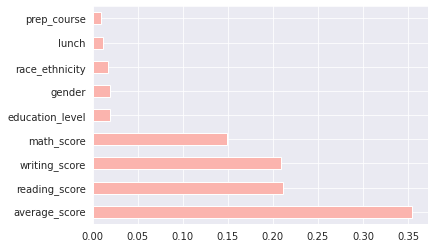

In [ ]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()